In [163]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os 
import pandas as pd
import pdb

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8,8 ),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large', 
         'font.size': 14}
pylab.rcParams.update(params)
#Define Computer
Malphigui=0
if Malphigui:
    directory='/home/pdavid/Bureau/Hybrid_2D_beta/Code' #Malpighi
    directory_script='/home/pdavid/Bureau/Hybrid_2D_beta/Figures_and_Tests/base'
    directory_article_figures='/home/pdavid/Bureau/Hybrid_2D_beta/Figures_and_Tests/Article_figs'
else: #Auto_58
    directory='/home/pdavid/Bureau/Code/Hybrid_2D_beta/Code/'
    directory_script='/home/pdavid/Bureau/Code/Hybrid_2D_beta/Figures_and_Tests/base'
    directory_article_figures='/home/pdavid/Bureau/Code/Hybrid_2D_beta/Figures_and_Tests/Article_figs'
    
    
os.chdir(directory)
csv_directory=directory_script+'/csv_outputs'
from Testing import extract_COMSOL_data

COMSOL_lin_dir=directory_script + '/COMSOL_output/linear'
COMSOL_metab_dir=directory_script + '/COMSOL_output/metab'

array_of_cells=np.squeeze(pd.read_csv(csv_directory + '/array_of_cells.csv').to_numpy())
print('range cells=',array_of_cells)

alpha=50

h=alpha/array_of_cells
print(h)

#Only for the odds (since the source is in hte center)
indexes=np.array([], dtype=int)
for i in range(len(array_of_cells)):
    if array_of_cells[i]%2:
        indexes=np.append(indexes, i)

range cells= [ 3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37]
[16.66666667 10.          7.14285714  5.55555556  4.54545455  3.84615385
  3.33333333  2.94117647  2.63157895  2.38095238  2.17391304  2.
  1.85185185  1.72413793  1.61290323  1.51515152  1.42857143  1.35135135]


In [164]:
csv_directory

'/home/pdavid/Bureau/Code/Hybrid_2D_beta/Figures_and_Tests/base/csv_outputs'

In [165]:
if Malphigui: print("YOU ARE IN MALPHIGUI")
print("Directory script: ", directory_script)
print("COMSOL_lin_dir: ", COMSOL_lin_dir)
print("csv_directory: ", csv_directory)

Directory script:  /home/pdavid/Bureau/Code/Hybrid_2D_beta/Figures_and_Tests/base
COMSOL_lin_dir:  /home/pdavid/Bureau/Code/Hybrid_2D_beta/Figures_and_Tests/base/COMSOL_output/linear
csv_directory:  /home/pdavid/Bureau/Code/Hybrid_2D_beta/Figures_and_Tests/base/csv_outputs


In [166]:
print(indexes)
print(array_of_cells[indexes])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
[ 3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37]


In [167]:
COMSOL_metab_dir
h=alpha/array_of_cells
print(h)

[16.66666667 10.          7.14285714  5.55555556  4.54545455  3.84615385
  3.33333333  2.94117647  2.63157895  2.38095238  2.17391304  2.
  1.85185185  1.72413793  1.61290323  1.51515152  1.42857143  1.35135135]


In [168]:
q_FEM_linear, phi_FEM_linear, FEM_x_linear, FEM_y_linear, FEM_x_1D_linear, FEM_y_1D_linear, x_1D_linear, y_1D_linear = extract_COMSOL_data(COMSOL_lin_dir, [1,1,1])

q_FEM_metab, phi_FEM_metab, FEM_x_metab, FEM_y_metab, FEM_x_1D_metab, FEM_y_1D_metab, x_1D_metab, y_1D_metab = extract_COMSOL_data(COMSOL_metab_dir, [1,1,1])



In [182]:
q_Multi_linear=pd.read_fwf(csv_directory + '/q_Multi_linear.csv').to_numpy()
q_Multi_metab=pd.read_fwf(csv_directory + '/q_Multi_metab.csv').to_numpy()
q_FV_metab=pd.read_fwf(csv_directory + '/q_FV_metab.csv').to_numpy()
q_FV_linear=pd.read_fwf(csv_directory + '/q_FV_linear.csv').to_numpy()
q_Multi_linear=pd.read_fwf(csv_directory + '/q_Multi_linear.csv').to_numpy()
phi_Multi_FEM_linear=pd.read_fwf(csv_directory + '/phi_Multi_FEM_linear.csv').to_numpy()
phi_Multi_FEM_metab=pd.read_fwf(csv_directory + '/phi_Multi_FEM_metab.csv').to_numpy()
err_phi_Multi_linear=pd.read_fwf(csv_directory + '/err_phi_Multi_linear.csv').to_numpy()
err_phi_Multi_metab=pd.read_fwf(csv_directory + '/err_phi_Multi_metab.csv').to_numpy()
err_phi_FV_linear=pd.read_fwf(csv_directory + '/err_phi_FV_linear.csv').to_numpy()
err_q_Multi_linear=pd.read_fwf(csv_directory + '/err_q_Multi_linear.csv').to_numpy()
err_q_Multi_metab=pd.read_fwf(csv_directory + '/err_q_Multi_metab.csv').to_numpy()
err_q_FV_metab=pd.read_fwf(csv_directory + '/err_q_FV_metab.csv').to_numpy()

err_phi_FV_metab=pd.read_fwf(csv_directory + '/err_phi_FV_metab.csv').to_numpy()

In [181]:
csv_directory

'/home/pdavid/Bureau/Code/Hybrid_2D_beta/Figures_and_Tests/base/csv_outputs'

In [170]:
err_q_FV_linear=np.abs((q_FEM_linear-q_FV_linear)/q_FEM_linear)


In [171]:
m=np.argmin(err_q_Multi_linear)
indexes=np.arange(m+1)


In [172]:
print(array_of_cells)
print(indexes)
print(err_q_Multi_linear*1000)

[ 3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37]
[0 1 2 3 4 5]
[[4.8675424 ]
 [1.58781541]
 [0.68962762]
 [0.31948407]
 [0.13196716]
 [0.02406727]
 [0.04364936]
 [0.08891391]
 [0.12065655]
 [0.14377192]
 [0.16112495]
 [0.17448309]
 [0.18498466]
 [0.19338965]
 [0.20022116]
 [0.20584875]
 [0.21053955]
 [0.2144905 ]]


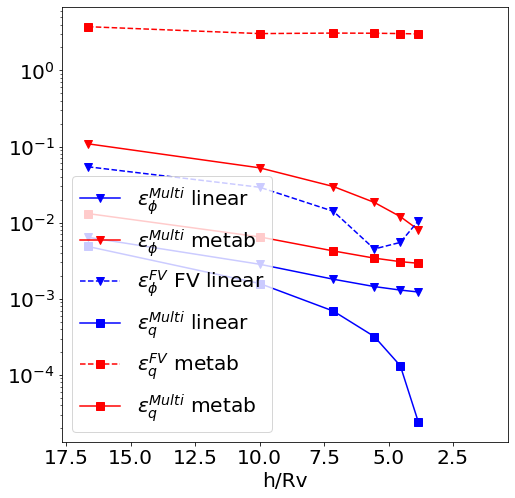

In [173]:
plt.plot(h[indexes], err_phi_Multi_linear[indexes], marker='v', color='b',markersize=8, label='$\\varepsilon_{\phi}^{Multi}$ linear')
plt.plot(h[indexes],err_phi_Multi_metab[indexes] ,marker='v', color='r',markersize=8, label='$\\varepsilon_{\phi}^{Multi}$ metab')
plt.plot(h[indexes], err_phi_FV_linear[indexes],'--v',color='b',markersize=8 , label='$\\varepsilon_{\phi}^{FV}$ FV linear')
plt.plot(h[indexes], err_q_Multi_linear[indexes], marker='s', color='b', markersize=8,label='$\\varepsilon_q^{Multi}$ linear')
plt.plot(h[indexes], err_q_FV_metab[indexes],'--s', color='r', markersize=8, label='$\\varepsilon_q^{FV}$ metab')
plt.plot(h[indexes], err_q_Multi_metab[indexes],marker='s',color='r', markersize=8, label='$\\varepsilon_q^{Multi}$ metab')
plt.xlim(max(h)+1, min(h)-1)
plt.yscale('log')
plt.xlabel('h/Rv')
plt.legend()



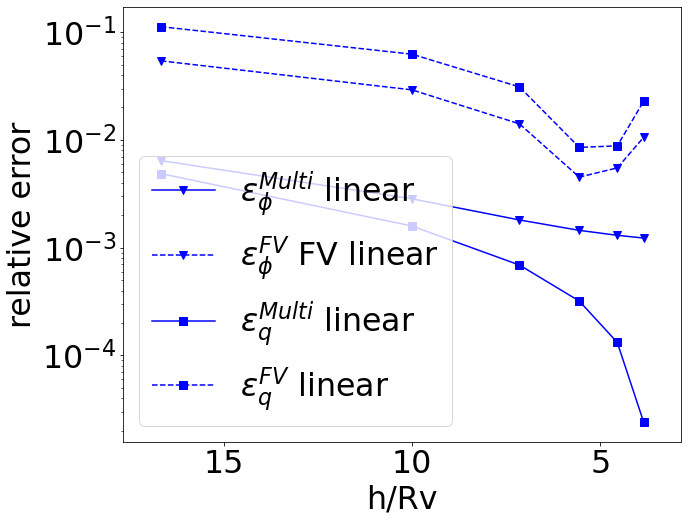

In [174]:
plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 22})
plt.plot(h[indexes], err_phi_Multi_linear[indexes], marker='v', color='b',markersize=8, label='$\\varepsilon_{\phi}^{Multi}$ linear')
plt.plot(h[indexes], err_phi_FV_linear[indexes],'--v',color='b',markersize=8 , label='$\\varepsilon_{\phi}^{FV}$ FV linear')
plt.plot(h[indexes], err_q_Multi_linear[indexes], marker='s', color='b', markersize=8,label='$\\varepsilon_q^{Multi}$ linear')
plt.plot(h[indexes], err_q_FV_linear[indexes], '--s', color='b', markersize=8, label='$\\varepsilon_q^{FV}$ linear')
plt.xlim(max(h)+1, h[indexes[-1]]-1)
plt.ylabel('relative error')
plt.yscale('log')
plt.xlabel('h/Rv')
plt.legend()
plt.savefig(directory_article_figures + '/Single_source/base/linear_errs.pdf')


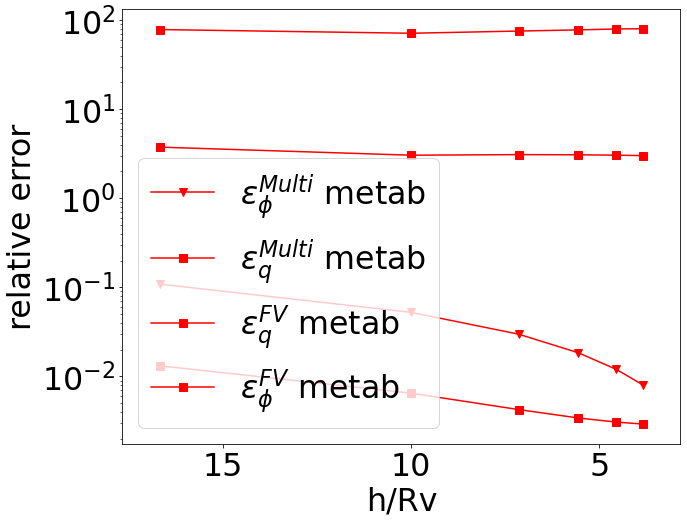

In [184]:
plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 22})
plt.plot(h[indexes],err_phi_Multi_metab[indexes] ,marker='v', color='r',markersize=8, label='$\\varepsilon_{\phi}^{Multi}$ metab')
plt.plot(h[indexes], err_q_Multi_metab[indexes],marker='s',color='r', markersize=8, label='$\\varepsilon_q^{Multi}$ metab')
plt.plot(h[indexes], err_q_FV_metab[indexes],marker='s',color='r', markersize=8, label='$\\varepsilon_q^{FV}$ metab')

plt.plot(h[indexes], err_phi_FV_metab[indexes],marker='s',color='r', markersize=8, label='$\\varepsilon_{\phi}^{FV}$ metab')
plt.ylabel('relative error')
plt.xlim(max(h)+1, h[indexes[-1]]-1)
plt.yscale('log')
plt.xlabel('h/Rv')
plt.legend()
plt.savefig(directory_article_figures + '/Single_source/base/metab_errs.pdf')

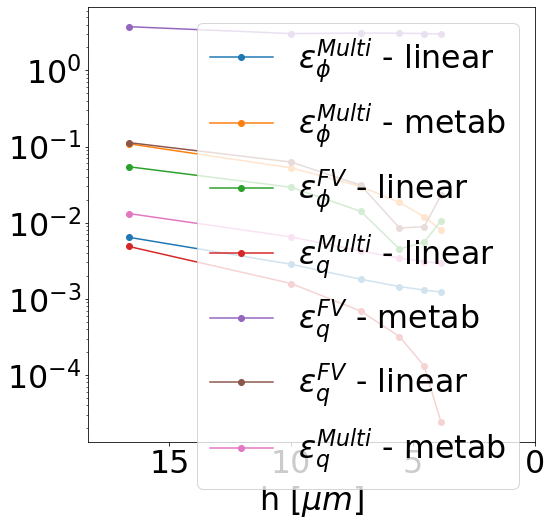

In [176]:
plt.plot(h[indexes], err_phi_Multi_linear[indexes],'-o', label='$\\varepsilon_{\phi}^{Multi}$ - linear')
plt.plot(h[indexes],err_phi_Multi_metab[indexes] ,'-o', label='$\\varepsilon_{\phi}^{Multi}$ - metab')
plt.plot(h[indexes], err_phi_FV_linear[indexes],'-o', label='$\\varepsilon_{\phi}^{FV}$ - linear')
plt.plot(h[indexes], err_q_Multi_linear[indexes], '-o',label='$\\varepsilon_{q}^{Multi}$ - linear')
plt.plot(h[indexes], err_q_FV_metab[indexes],'-o', label='$\\varepsilon_{q}^{FV}$ - metab')

plt.plot(h[indexes], err_q_FV_linear[indexes],'-o', label='$\\varepsilon_{q}^{FV}$ - linear')
plt.plot(h[indexes], err_q_Multi_metab[indexes],'-o', label='$\\varepsilon_{q}^{Multi}$ - metab')

plt.xlim(max(h)*1.1, 0)
plt.yscale('log')
plt.xlabel('h [$\mu m$]')
plt.legend()

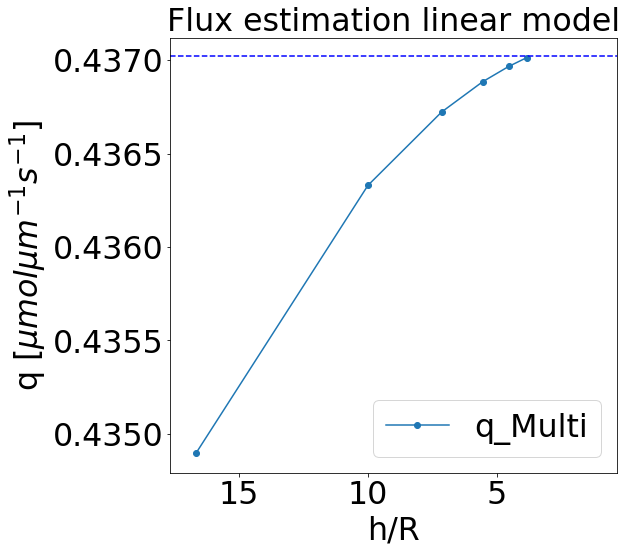

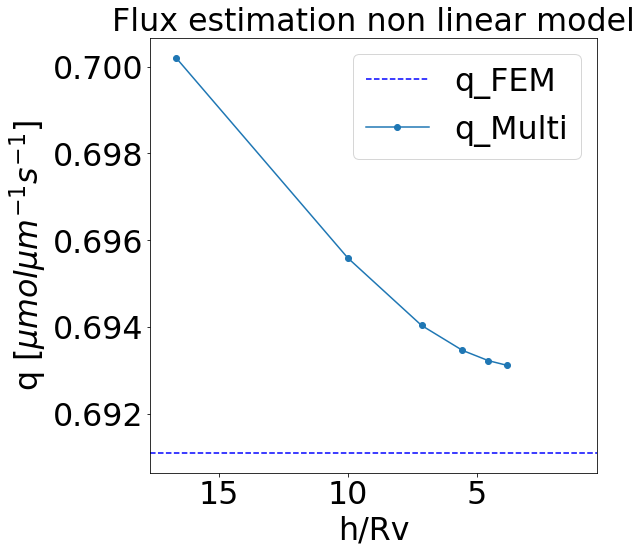

In [177]:
plt.plot(h[indexes],np.array(q_Multi_linear)[indexes],'-o' ,label='q_Multi')
plt.legend()
plt.xlabel('h/R')
plt.xlim(max(h)+1, min(h)-1)
plt.ylabel('q [$\mu mol \mu m^{-1} s^{-1}$]')
plt.axhline(y = q_FEM_linear, color = 'b', linestyle = '--', label='q_FEM')
plt.title('Flux estimation linear model')
plt.show()

plt.axhline(y = q_FEM_metab, color = 'b', linestyle = '--', label='q_FEM')
plt.plot(h[indexes], np.array(q_Multi_metab)[indexes],'-o', label='q_Multi')
plt.legend()
plt.xlabel('h/Rv')
plt.xlim(max(h)+1, min(h)-1)
plt.ylabel('q [$\mu mol \mu m^{-1} s^{-1}$]')
plt.title('Flux estimation non linear model')
plt.show()

In [178]:
indexes

array([0, 1, 2, 3, 4, 5])

In [179]:
plt.tricontourf(phi_Multi_cart_linear['x'], phi_Multi_cart_linear['y'], phi_Multi_cart_linear['phi'], levels=100)
plt.title('Contour Multi linear model')
plt.colorbar()
plt.show()

plt.tricontourf( FEM_x_linear/1e6, FEM_y_linear/1e6,FEM_phi_linear, levels=100)
plt.title('Contour FEM linear model')
plt.colorbar()
plt.show()

plt.tricontourf( FEM_x_linear/1e6, FEM_y_linear/1e6,FEM_phi_linear-phi_Multi_FEM_linear['phi'], levels=100)
plt.title('Absolute error model + reconstruction')
plt.colorbar()
plt.show()


NameError: name 'phi_Multi_cart_linear' is not defined

In [188]:
array_of_cells[indexes] 



0.0015384615384615385

3.8461538461538463